# Dataset loading

In [34]:
!pip install 'dvc[gdrive]'

import pandas as pd
import matplotlib.pyplot as plt
import dvc.api

In [8]:
def read_dataset():
    with dvc.api.open('dataset/dataset_research.csv', repo='https://github.com/ArturGogiyan/NLP_research') as fd:
        return pd.read_csv(fd)

In [9]:
df = read_dataset()

print("Shape of data=>",df.shape)

/home/basicec/PycharmProjects/NLP_research1/venv/lib/python3.8/site-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access /tmp/tmpt9v7_3_rdvc-clone/.dvc/tmp/gdrive-user-credentials.json: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=710796635688-iivsgbgsb6uv1fap6635dhvuei09o66c.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.appdata&access_type=offline&response_type=code&approval_prompt=force

Authentication successful.
Shape of data=> (5000, 6)


# Exploratory data analysis

Создание списка всех лейблов, присутствующих в данных

In [10]:
comment_labels = {}
comment_labels_combinations = {}
unique_labels = set()
unique_labels_combinations = set()

for i, row in df.iterrows():
    label_index = 0
    k = 0
    for j, cell in row.items():
        if str(cell)[:6] == '[\'824.':
            label_index = k
            break
        k+=1


    labels = row[k][1:-1].split(',')

    comment = ' '.join(row[:k])
    row['comment'] = comment
    for j, label in enumerate(labels):
        label_stripped = label.strip()[5:-3]
        labels[j] = label_stripped
        if label_stripped not in unique_labels:
            unique_labels.add(label_stripped)
    labels_combination = ' & '.join(labels)
    if labels_combination not in unique_labels_combinations:
       unique_labels_combinations.add(labels_combination)
    comment_labels[i] = labels
    comment_labels_combinations[i] = labels_combination

создание pandas.dataframe с разреженным вектором фич, где каждая колонка - отдельный лэйбл

In [11]:
df_unique_combinations = df[['comment']].copy()
for label in unique_labels:
  df[label] = 0
for label_combination in unique_labels_combinations:
  df_unique_combinations[label_combination] = 0

In [12]:
df = df.drop(df.columns[[1, 2, 3, 4, 5]], axis=1)

In [13]:
for index, labels in comment_labels.items():
  for label in labels:
    df.at[index, label] = 1

for index, label_combination in comment_labels_combinations.items():
  for label in label_combination:
    df_unique_combinations.at[index, label_combination] = 1

вывод первых 5 записей отформатированного датафрейма

In [14]:
df.head(5)

,comment,company-brand.convenience,logistics-rides.speed,staff-support.agent-named,logistics-rides.order-accuracy,account-management.fingerprint-facial-recognition,purchase-booking-experience.choice-variety,company-brand.general-satisfaction,account-management.account-access,attributes.cleanliness,attributes.size-fit,attributes.taste-flavour,online-experience.updates-versions,online-experience.language,staff-support.email,company-brand.competitor
0,"easy, very accessible",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Just a horrible app with a sign up experience ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Downloaded the latest update and it still logs...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,Since latest update from Apple for the iPhone ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,"Shockingly bad since the update, I had to rein...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
df_unique_combinations.head(5)

,comment,company-brand.competitor & online-experience.updates-versions,company-brand.general-satisfaction & purchase-booking-experience.choice-variety,logistics-rides.speed,account-management.account-access & online-experience.updates-versions,account-management.account-access & company-brand.competitor,company-brand.convenience & company-brand.general-satisfaction,account-management.fingerprint-facial-recognition & account-management.account-access & company-brand.convenience,company-brand.general-satisfaction & company-brand.competitor,company-brand.general-satisfaction & company-brand.competitor & online-experience.updates-versions,...,company-brand.general-satisfaction & company-brand.convenience,account-management.fingerprint-facial-recognition & account-management.account-access & online-experience.updates-versions,purchase-booking-experience.choice-variety,company-brand.general-satisfaction,company-brand.convenience & online-experience.updates-versions,account-management.account-access,account-management.fingerprint-facial-recognition & company-brand.convenience,account-management.fingerprint-facial-recognition & company-brand.general-satisfaction,company-brand.general-satisfaction & online-experience.language,account-management.account-access & company-brand.general-satisfaction & online-experience.updates-versions
0,"easy, very accessible",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Just a horrible app with a sign up experience ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Downloaded the latest update and it still logs...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Since latest update from Apple for the iPhone ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"Shockingly bad since the update, I had to rein...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Посмотрим на количество пустых полей в датасете

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   comment                                            5000 non-null   object
 1   company-brand.convenience                          5000 non-null   int64 
 2   logistics-rides.speed                              5000 non-null   int64 
 3   staff-support.agent-named                          5000 non-null   int64 
 4   logistics-rides.order-accuracy                     5000 non-null   int64 
 5   account-management.fingerprint-facial-recognition  5000 non-null   int64 
 6   purchase-booking-experience.choice-variety         5000 non-null   int64 
 7   company-brand.general-satisfaction                 5000 non-null   int64 
 8   account-management.account-access                  5000 non-null   int64 
 9   attributes.cleanlin

Получим частоты лейблов в датасете

In [17]:
feature_freqs =  df.sum(axis = 0, skipna = True)[1:].sort_values(ascending=True)

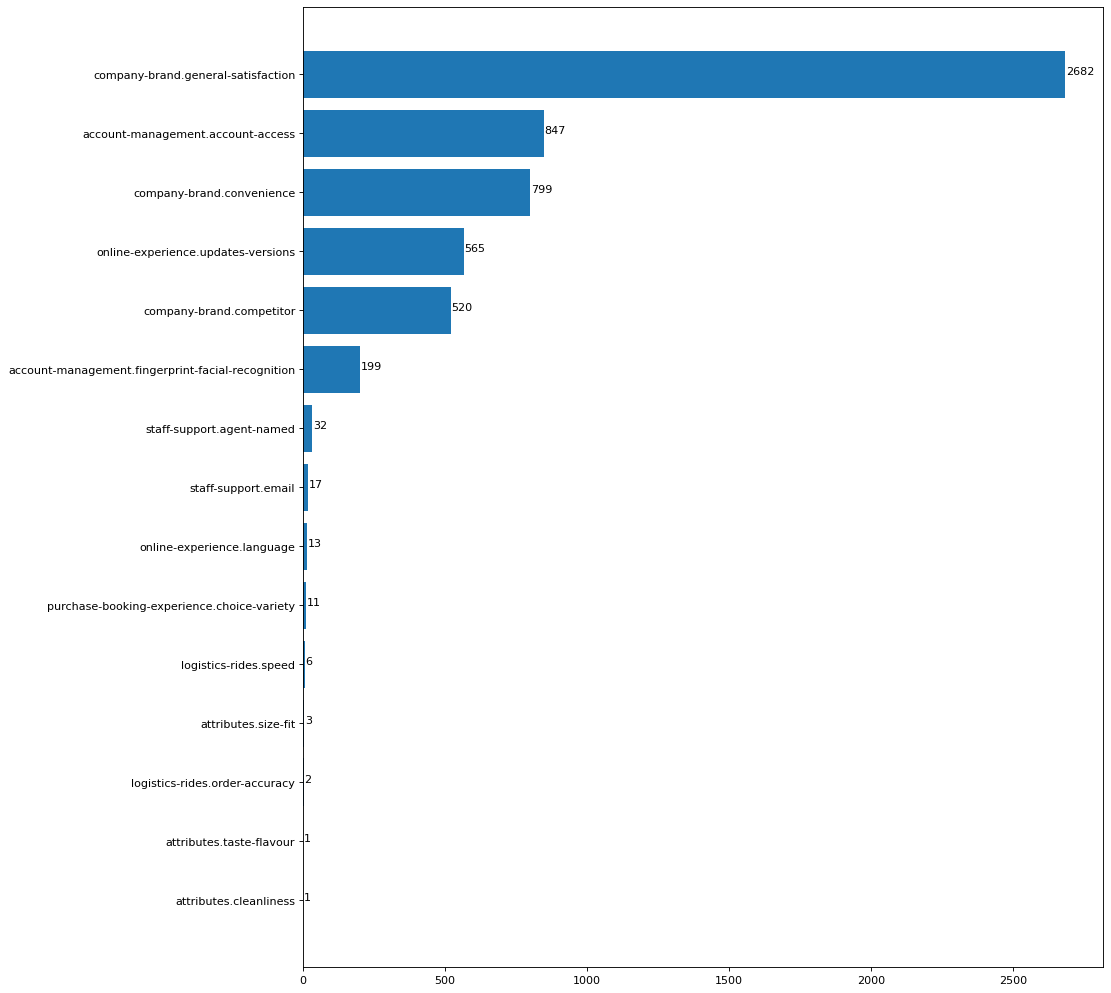

In [18]:
fig = plt.figure(figsize=(10, 12), dpi=80)
plt.xlabel('feature')
plt.ylabel('frequency')
plt.title('frequency of different features in applied dataset')

ax = fig.add_axes([0,0,1,1])
ax.barh(feature_freqs.keys(),feature_freqs.values)

xlocs, xlabs = plt.xticks()
for i, v in enumerate(feature_freqs.values):
    ax.text(v + 3, i, str(v))

plt.show()

как видно, датасет не сбалансирован: для некоторых лэйблов существует лишь по несколько записей.
К примеру, лэйблы **attributes.cleanliness** и **attributes.taste-flavour** представленны лишь в 1 записи.

Рассмотрим распределение комментариев по сочетаниям лейблов

In [19]:
feature_freqs_combinations =  df_unique_combinations.sum(axis = 0, skipna = True)[1:].sort_values(ascending=True)

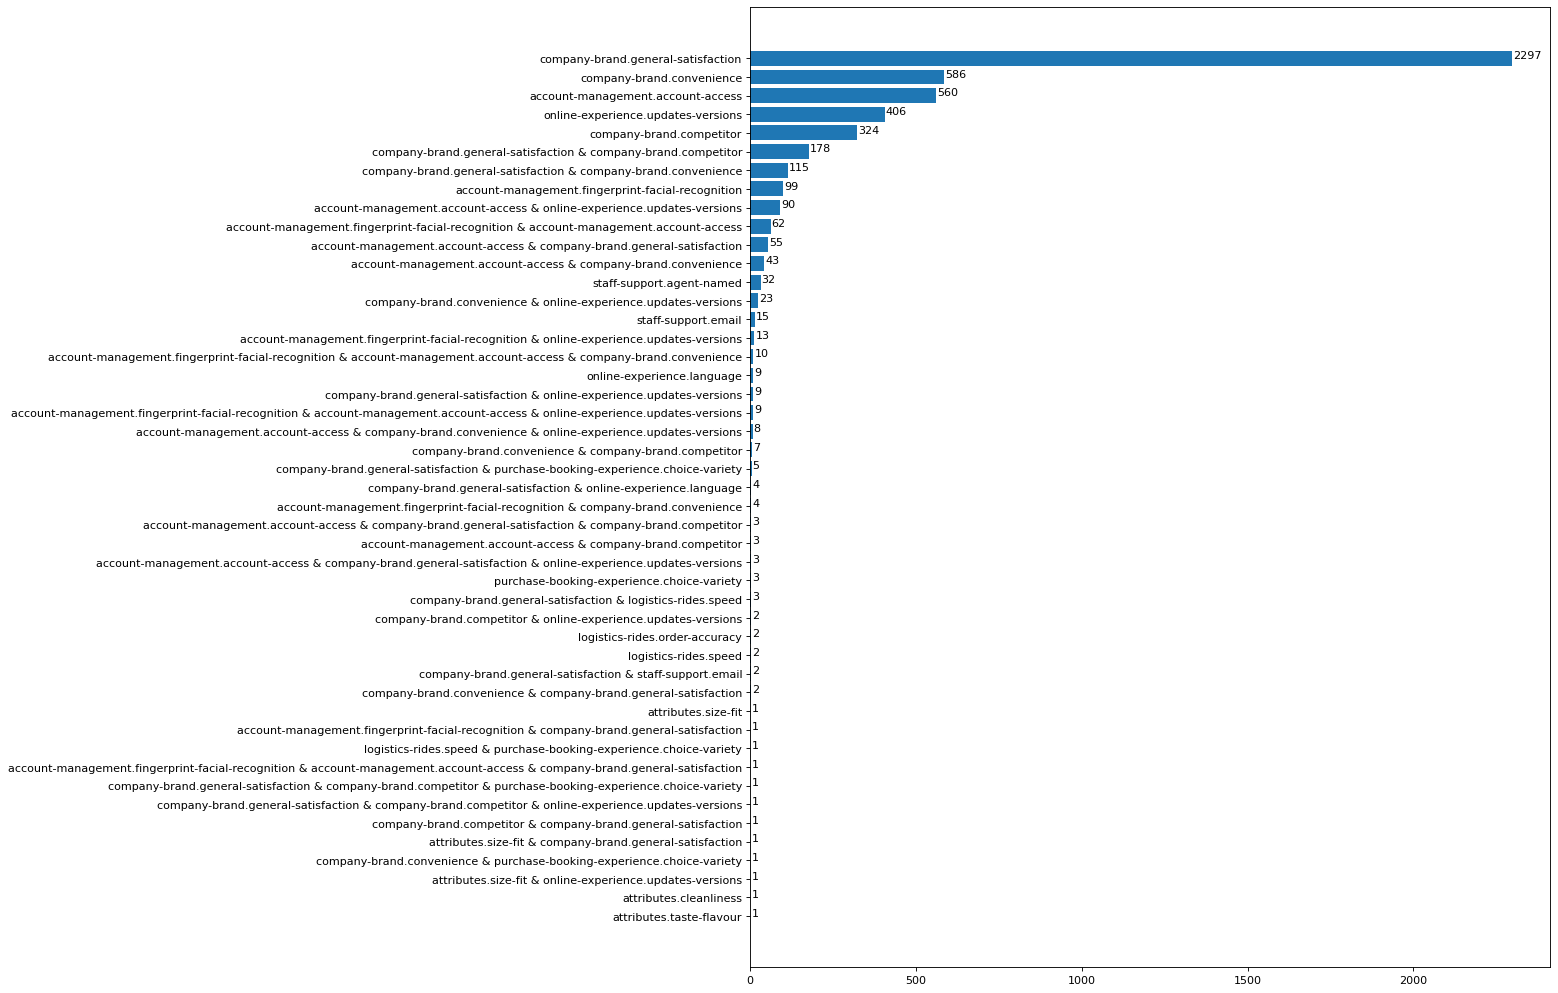

In [20]:
fig = plt.figure(figsize=(10, 12), dpi=80)
plt.xlabel('feature')
plt.ylabel('frequency')
plt.title('frequency of different features in applied dataset')

ax = fig.add_axes([0,0,1,1])
ax.barh(feature_freqs_combinations.keys(),feature_freqs_combinations.values)

xlocs, xlabs = plt.xticks()
for i, v in enumerate(feature_freqs_combinations.values):
    ax.text(v + 3, i, str(v))

plt.show()

# Non-neural network processing

## Preparations

Resources needed:

In [21]:
import nltk
from nltk.stem import WordNetLemmatizer
import re
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
%matplotlib inline
nltk.download('wordnet')
minimum_classes = 0

[nltk_data] Downloading package wordnet to /home/basicec/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Lemmatization

In [22]:
def make_lemmas(tokens):
    return ' '.join(list(map(lambda t: lemmatizer.lemmatize(t), tokens)))
def preprocess(text):
    return re.findall(re.compile(r'[A-ZА-Яa-zа-яёË]+'), text.lower())
lemmatizer = WordNetLemmatizer()

In [23]:
def get_train_and_test(class_name = "All", test_percentage = 50):
    if test_percentage > 0 and test_percentage <= 100:
        texts = []
        Ys = []
        classes = (list(df.columns.values))
        for index, row in df.iterrows():
            texts.append(row['comment'])
            if class_name == "All":
              for col in df.columns.values:
                if row[col] == 1:
                  Ys.append(classes.index(col))
                  break
            else:
                Ys.append(row[class_name])

        ys_chk = 0
        if class_name != "All":
            for ys in Ys:
                ys_chk +=ys
            if ys_chk < minimum_classes:
                return [], [], [], []

        test_size   = int(len(texts) * test_percentage / 100)
        train_size  = len(texts) - test_size
        texts_train = texts[:train_size]
        texts_test  = texts[:-test_size]
        y_train     = Ys[:train_size]
        y_test      = Ys[:-test_size]
        texts_train = [make_lemmas(preprocess(text=text)) for text in texts_train]
        texts_test  = [make_lemmas(preprocess(text=text)) for text in texts_test]

        return texts_train, texts_test, y_train, y_test

### Bag of Words implementation

In [24]:
class bag_of_words:
    def __init__(self, texts, K = 0):
      k = 0
      if K > 0:
          k = K
      else:
        k = len(set(' '.join(texts).split()))
      bag = dict()
      for comment in texts:
          for word in comment.split(' '):
              if word not in bag.keys():
                  bag[word] = 1
              else:
                  bag[word] += 1
      self.bow_vocabulary = dict(sorted(bag.items(), key=lambda item: item[1], reverse=True)[:k])


    def bow_vocabulary(self):
      return self.bow_vocabulary

    def text_to_bow(self, text):
        bow = [0] * len(self.bow_vocabulary)
        voc_map = dict()

        for num, w in enumerate(self.bow_vocabulary, start=0):
            voc_map[w] = num

        for token in text.split(' '):
            if token in voc_map:
                bow[voc_map[token]] += 1

        return np.array(bow, 'float32')



## Naive Bayes Classifier

In [25]:
def bayes_test(class_name, test_percentage):
    print("\'"+class_name+"\' MODEL:")
    texts_train, texts_test, y_train, y_test = get_train_and_test(class_name, test_percentage)
    if len(texts_train) == 0:
        print ("Class entities amount is too small! Ignoring...")
        return [], [], []

    bow = bag_of_words(texts_train)
    X_train_bow = np.stack(list(map(bow.text_to_bow, texts_train)))
    X_test_bow = np.stack(list(map(bow.text_to_bow, texts_test)))
    naive_model = GaussianNB().fit(X_train_bow, y_train)
    ret = naive_model.predict(X_test_bow)
    test_accuracy = np.mean(ret == y_test)
    print(f"Model accuracy: {test_accuracy:.3f}")
    metrics.plot_roc_curve(naive_model, X_test_bow, y_test)

    return texts_test, ret, y_test

In [28]:
def make_bayes_models(test_percentage):

    classes = (list(df.columns.values))
    classes.pop(0)
    i = 1
    bayes_result = []
    bayes_df = pd.DataFrame()

    for c in classes:
        try:
            test_text, predicted_y, correct_y = bayes_test(c, test_percentage)
            if len(test_text) > 0:
              i+=1
              if len(bayes_result) == 0:
                    bayes_result.append(test_text)
                    bayes_df["Data"] = test_text
              correct_incorrect = []
              for y_ind in range(len(predicted_y)):
                  if predicted_y[y_ind] == correct_y[y_ind]:
                      correct_incorrect.append("+")
                  else:
                      correct_incorrect.append("-")
              bayes_result.append(correct_incorrect)
              bayes_df[c] = correct_incorrect

        except Exception as e:
          print(c+" error!")
          print(e)

    return bayes_df

'company-brand.convenience' MODEL:
Model accuracy: 0.772
'logistics-rides.speed' MODEL:
Model accuracy: 0.999
'staff-support.agent-named' MODEL:
Model accuracy: 0.990
'logistics-rides.order-accuracy' MODEL:
Model accuracy: 1.000
'account-management.fingerprint-facial-recognition' MODEL:
Model accuracy: 0.861
'purchase-booking-experience.choice-variety' MODEL:
Model accuracy: 0.999
'company-brand.general-satisfaction' MODEL:
Model accuracy: 0.873
'account-management.account-access' MODEL:
Model accuracy: 0.682
'attributes.cleanliness' MODEL:
Model accuracy: 1.000
'attributes.size-fit' MODEL:
Model accuracy: 1.000
'attributes.taste-flavour' MODEL:
Model accuracy: 1.000
'online-experience.updates-versions' MODEL:
Model accuracy: 0.766
'online-experience.language' MODEL:
Model accuracy: 0.999
'staff-support.email' MODEL:
Model accuracy: 0.989
'company-brand.competitor' MODEL:
Model accuracy: 0.759


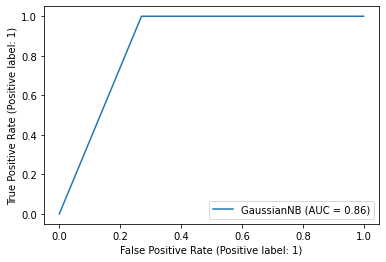

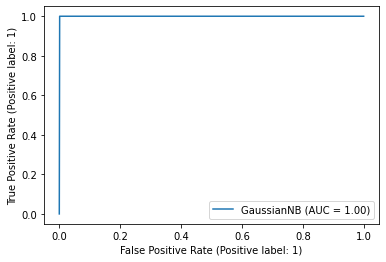

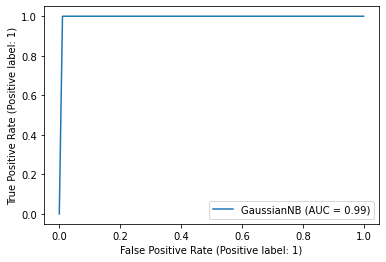

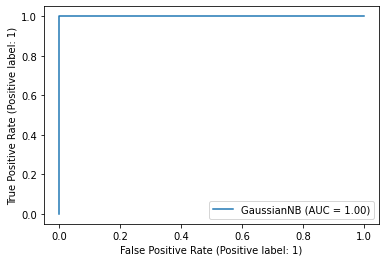

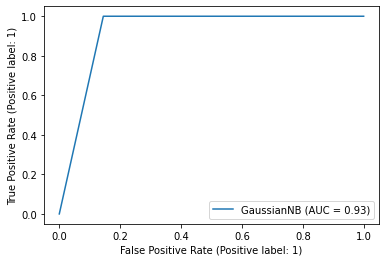

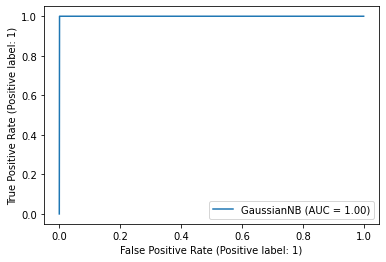

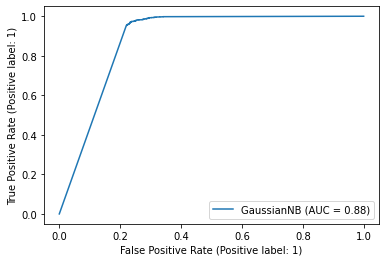

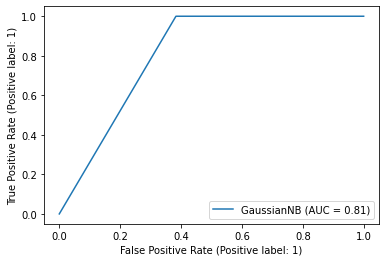

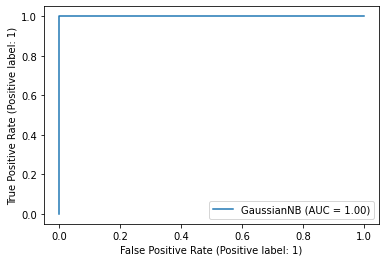

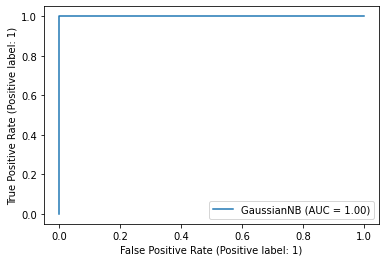

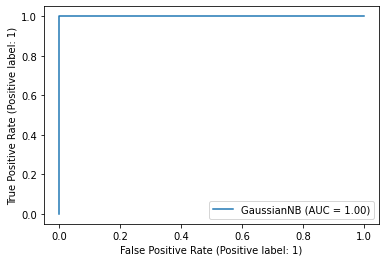

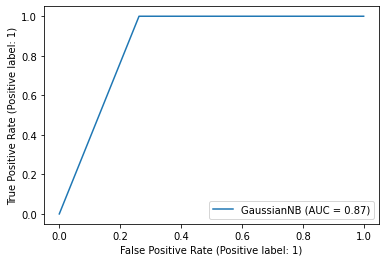

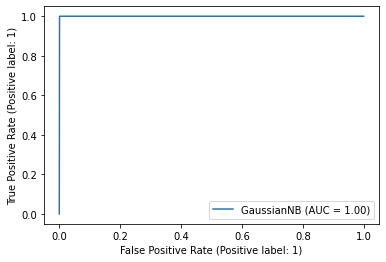

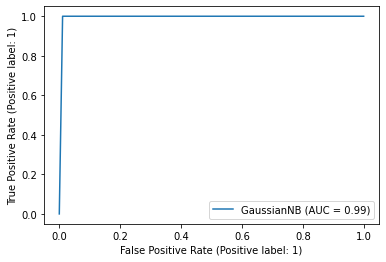

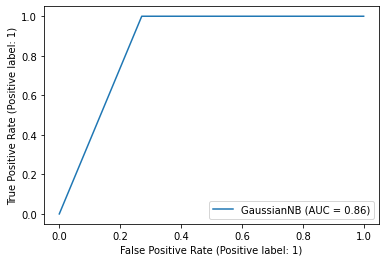

Overall efficiency:0.56


In [29]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
bayes_df = make_bayes_models(50)
bayes_classes = (list(bayes_df.columns.values))
total_sz = 0.0
correct_sz = 0.0

for ind in bayes_df.index:

    total_sz += 1
    correct = True
    for c in bayes_classes:
      if bayes_df[c][ind] == '-':
        correct = False
        break
    if correct:
      correct_sz += 1

plt.show()
print("Overall efficiency:"+"{:.2f}".format(correct_sz / total_sz))

## XGBoost

In [33]:
def xgb_test(test_percentage):

    texts_train, texts_test, y_train, y_test = get_train_and_test("All", test_percentage)
    if len(texts_train) == 0:
        print ("Class entities amount is too small! Ignoring...")
        return [], [], []

    bow = bag_of_words(texts_train)
    X_train_bow = np.stack(list(map(bow.text_to_bow, texts_train)))
    X_test_bow  = np.stack(list(map(bow.text_to_bow, texts_test)))
    D_train     = xgb.DMatrix(X_train_bow, label=y_train)
    D_test      = xgb.DMatrix(X_test_bow, label=y_test)

    param = {
        'eta': 0.3,
        'max_depth': 3,
        'objective': 'multi:softprob',
        'num_class': len(list(df.columns.values))}

    steps = 20

    xgb_model = xgb.train(param, D_train, steps)

    preds = xgb_model.predict(D_test)
    best_preds = np.asarray([np.argmax(line) for line in preds])

    print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
    print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
    print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
    return xgb_model

xgb_model = xgb_test(50)
xgb_model.save_model('./model/xgb.json')


[20:51:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision = 0.48645992737252974
Recall = 0.3993428656442023
Accuracy = 0.8308


# Neural network processing

## Bert with pytorch

In [ ]:
from sklearn.model_selection import train_test_split